| Abbreviation   | Full Form                                 |
|:---------------|:------------------------------------------|
| FAVC           | Frequent consumption of high caloric food |
| FCVC           | Frequency of consumption of vegetables    |
| NCP            | Number of main meals                      |
| CAEC           | Consumption of food between meals         |
| CH20           | Consumption of water daily                |
| CALC           | Consumption of alcohol                    |
| SCC            | Calories consumption monitoring           |
| FAF            | Physical activity frequency               |
| TUE            | Time using technology devices             |
| MTRANS         | Transportation used                       |

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
df = pd.read_csv('df.csv')
df.shape

In [ ]:
#Data Quality : Checking with WHO data and finding the significance of the Data

In [ ]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI', 'Outliers', 'Level'],
      dtype='object')

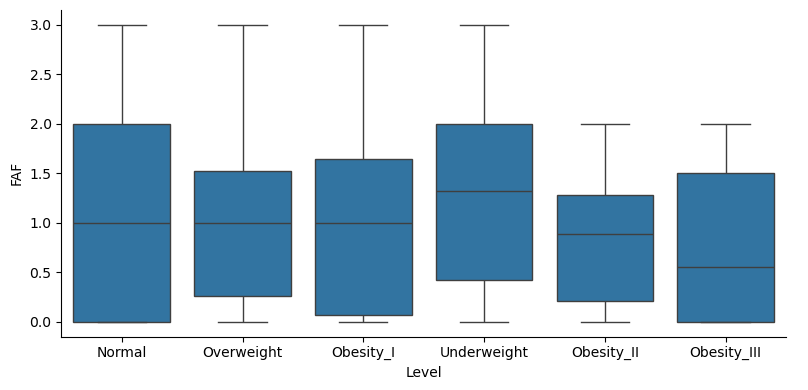

In [ ]:
sns.catplot(
    data=df, x="Level", y="FAF", 
    kind="box", height=4, aspect=2,
)

In [ ]:
dfv1 = df.groupby(['Level', 'MTRANS'])['Gender'].count().reset_index()
dfv1.columns = ['Level', 'Transport', 'Count']
dfv1

,Level,Transport,Count
0,Normal,Automobile,48
1,Normal,Bike,4
2,Normal,Motorbike,6
3,Normal,Public_Transportation,206
4,Normal,Walking,32
5,Obesity_I,Automobile,109
6,Obesity_I,Motorbike,3
7,Obesity_I,Public_Transportation,255
8,Obesity_I,Walking,3
9,Obesity_II,Automobile,97


In [ ]:
fig = px.bar(dfv1, x='Level', y='Count', color = 'Transport')

fig.update_xaxes(categoryorder='array', categoryarray= ['Underweight', 'Normal', 'Overweight', 'Obesity_I', 'Obesity_II', 'Obesity_III'])
fig.show()

In [ ]:
# Frequent consumption of high caloric food

dfv2 = df.groupby(['Level', 'FAVC'])['Gender'].count().reset_index()
dfv2.columns = ['Level', 'FAVC', 'Count']
fig = px.bar(dfv2, x='Level', y='Count', color = 'FAVC')

fig.update_xaxes(categoryorder='array', categoryarray= ['Underweight', 'Normal', 'Overweight', 'Obesity_I', 'Obesity_II', 'Obesity_III'])
fig.show()


In [ ]:
# Vegetables consumptions

dfv3 = df.groupby(['Level', 'FCVC'])['Gender'].count().reset_index()
dfv3.columns = ['Level', 'FCVC', 'Count']
fig = px.bar(dfv3, x='Level', y='Count', color = 'FCVC')

fig.update_xaxes(categoryorder='array', categoryarray= ['Underweight', 'Normal', 'Overweight', 'Obesity_I', 'Obesity_II', 'Obesity_III'])
fig.show()


In [ ]:
df.groupby(['Level', 'FCVC'])['Gender'].count().reset_index()

,Level,FCVC,Gender
0,Normal,1.000000,18
1,Normal,1.753750,1
2,Normal,1.773265,1
3,Normal,1.836554,1
4,Normal,1.972545,1
...,...,...,...
832,Underweight,2.977018,1
833,Underweight,2.979383,1
834,Underweight,2.984004,1
835,Underweight,2.984425,1


In [ ]:
df['FCVC'].value_counts()

FCVC
3.000000    650
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.706134      1
2.010684      1
2.300408      1
2.119643      1
2.680375      1
Name: count, Length: 808, dtype: int64

In [ ]:
df = df.drop(columns = ['NObeyesdad', 'BMI', 'Outliers', 'Weight'])
df

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Level
0,Female,21.000000,1.620000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal
1,Female,21.000000,1.520000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal
2,Male,23.000000,1.800000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal
3,Male,27.000000,1.800000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight
4,Male,22.000000,1.780000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,Female,20.976842,1.710730,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_III
2103,Female,21.982942,1.748584,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_III
2104,Female,22.524036,1.752206,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_III
2105,Female,24.361936,1.739450,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_III


In [ ]:
X = df.drop('Level', axis = 1)
y = df['Level']
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()

cross_val_score(rf, X_train, y_train, cv=10)

array([0.82248521, 0.86982249, 0.82248521, 0.84023669, 0.85798817,
       0.85119048, 0.85714286, 0.83928571, 0.88095238, 0.875     ])

In [ ]:
rf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8601895734597157

In [ ]:
importances = rf.feature_importances_

In [ ]:
importances

array([1.38705706e-01, 1.13727036e-01, 1.12091655e-01, 7.27593914e-02,
       8.37010249e-02, 8.21004649e-02, 8.00305076e-02, 3.11370718e-02,
       2.94442848e-02, 2.37921612e-02, 2.86759138e-02, 1.33682720e-02,
       1.23932424e-02, 4.54395048e-03, 2.12152205e-02, 2.52823725e-02,
       6.31939282e-03, 3.17574320e-03, 3.38929880e-03, 5.87068877e-03,
       6.30076640e-03, 8.22032972e-05, 5.86231692e-03, 2.46673287e-02,
       2.36295096e-02, 1.83724312e-02, 4.98265466e-04, 1.00742424e-03,
       2.21229063e-02, 5.73344863e-03])

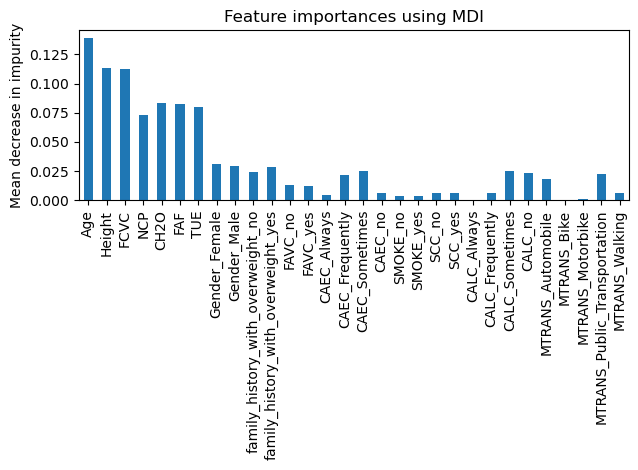

In [ ]:
feature_names = X_train.columns
#std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:

le = LabelEncoder()
le.fit(y)


le.classes_

y = le.transform(y)

In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5])

In [ ]:
# conda install -c conda-forge xgboost

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# declare parameters
params = {
            'objective':'multi:softprob',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           

params = {
            'objective':'multi:softprob',
            'verbosity' : 1
}


# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
accuracy_score(y_pred, y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:



#y_test


0.8507109004739336

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

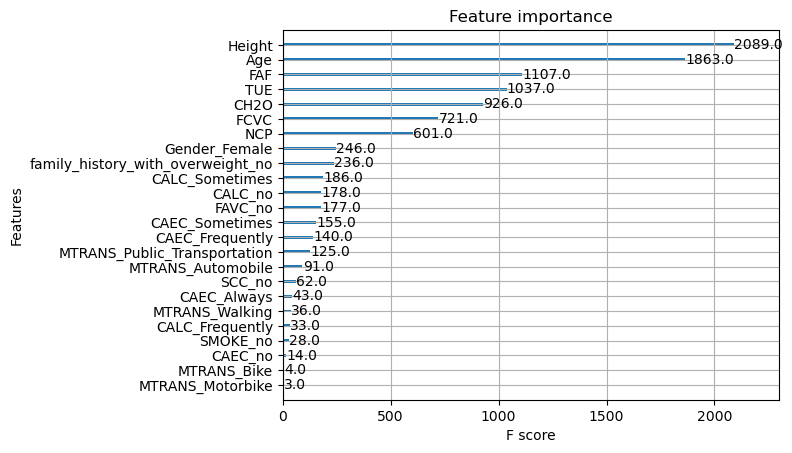

In [ ]:
xgb.plot_importance(xgb_clf)


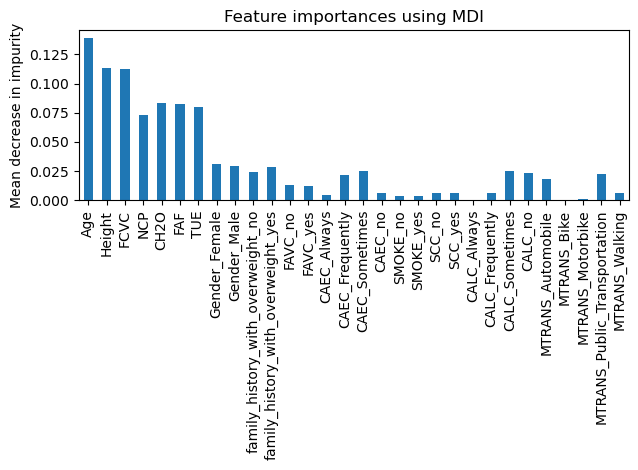

In [ ]:
feature_names = X_train.columns
#std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
X_train.columns

Index(['Age', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Female',
       'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

In [ ]:
dtrain = X.copy()
dtrain['Levels'] = y

dtrain 

,Age,Height,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Levels
0,21.000000,1.620000,2.0,3.0,2.000000,0.000000,1.000000,True,False,False,...,False,False,False,True,False,False,False,True,False,0
1,21.000000,1.520000,3.0,3.0,3.000000,3.000000,0.000000,True,False,False,...,False,False,True,False,False,False,False,True,False,0
2,23.000000,1.800000,2.0,3.0,2.000000,2.000000,1.000000,False,True,False,...,False,True,False,False,False,False,False,True,False,0
3,27.000000,1.800000,3.0,3.0,2.000000,2.000000,0.000000,False,True,True,...,False,True,False,False,False,False,False,False,True,4
4,22.000000,1.780000,2.0,1.0,2.000000,0.000000,0.000000,False,True,True,...,False,False,True,False,False,False,False,True,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,20.976842,1.710730,3.0,3.0,1.728139,1.676269,0.906247,True,False,False,...,False,False,True,False,False,False,False,True,False,3
2103,21.982942,1.748584,3.0,3.0,2.005130,1.341390,0.599270,True,False,False,...,False,False,True,False,False,False,False,True,False,3
2104,22.524036,1.752206,3.0,3.0,2.054193,1.414209,0.646288,True,False,False,...,False,False,True,False,False,False,False,True,False,3
2105,24.361936,1.739450,3.0,3.0,2.852339,1.139107,0.586035,True,False,False,...,False,False,True,False,False,False,False,True,False,3


In [ ]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['Levels'].values) 

        

        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        

        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Levels'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : " , accuracy_score(dtrain['Levels'].values, dtrain_predictions))
    #print ("AUC Score (Train): ", roc_auc_score(dtrain['Levels'], dtrain_predprob))
                    
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')

    xgb.plot_importance(xgb_clf)


Model Report
Accuracy :  1.0


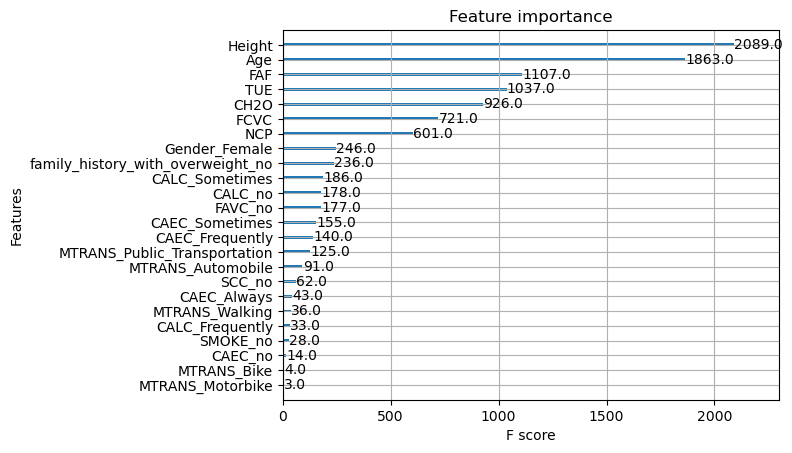

In [ ]:
predictors = [x for x in dtrain.columns if x not in ['Levels']]



xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 num_class = 6,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 nthread=4,
 scale_pos_weight=1,
 seed=27)



modelfit(xgb1, dtrain, predictors)

In [ ]:
#xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['Levels'].values)
#
#xgb_param = xgb1.get_xgb_params()
#early_stopping_rounds=50
#
#cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=xgb1.get_params()['n_estimators'], nfold=5,
#            metrics='auc', early_stopping_rounds=early_stopping_rounds)

In [ ]:
estimator = XGBClassifier(
    objective= 'multi:softprob',
    nthread=4,
    seed=42
)

parameters = {
    'objective': ['multi:softprob', 'multi:softmax'],
    'max_depth': range (2, 10, 3),
    'n_estimators': range(20, 200, 20),
    'learning_rate': [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05],
    
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc_ovr',
    n_jobs = 10,
    cv = 5,
    verbose=True, 
    error_score="raise"
)


grid_search.fit(X, y)



print("Grid scores on development set:")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']


for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Grid scores on development set:
0.530 (+/-0.062) for {'learning_rate': 5, 'max_depth': 2, 'n_estimators': 10}
0.530 (+/-0.062) for {'learning_rate': 5, 'max_depth': 2, 'n_estimators': 20}
0.512 (+/-0.047) for {'learning_rate': 5, 'max_depth': 5, 'n_estimators': 10}
0.512 (+/-0.047) for {'learning_rate': 5, 'max_depth': 5, 'n_estimators': 20}
0.530 (+/-0.086) for {'learning_rate': 5, 'max_depth': 8, 'n_estimators': 10}
0.536 (+/-0.093) for {'learning_rate': 5, 'max_depth': 8, 'n_estimators': 20}
0.908 (+/-0.118) for {'learning_rate': 1, 'max_depth': 2, 'n_estimators': 10}
0.922 (+/-0.123) for {'learning_rate': 1, 'max_depth': 2, 'n_estimators': 20}
0.944 (+/-0.110) for {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 10}
0.949 (+/-0.105) for {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 20}
0.950 (+/-0.097) for {'learning_rate': 1, 'max_depth': 8, 'n_estimators': 10}
0.954 (+/-0.094) for {'learning_rate': 1, 'max_d

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#{'learning_rate': 1, 'max_depth': 8, 'n_estimators': 20}
# declare parameters
params = {
            'objective':'multi:softprob',
            'max_depth': 8,
            #'alpha': 10,
            'learning_rate': 1,
            'n_estimators':20
        }         
           



# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.8388625592417062

In [ ]:
grid_search.cv_results_['mean_test_score']

array([0.49926595, 0.59734122, 0.63019478, 0.6469731 , 0.65977126,
       0.58664426, 0.64185791, 0.66258025, 0.67729425, 0.68278108,
       0.61458928, 0.66169565, 0.69372296, 0.70888551, 0.71082648,
       0.63200463, 0.68165304, 0.70482869, 0.72295486, 0.72368828,
       0.65534868, 0.70168134, 0.71484561, 0.72024771, 0.72672161,
       0.65912095, 0.70192677, 0.71303456, 0.71936808, 0.72231244,
       0.6673703 , 0.6958711 , 0.7137429 , 0.71804297, 0.7210014 ,
       0.67199771, 0.70488848, 0.71598178, 0.7204318 , 0.71949021,
       0.43785917, 0.48223061, 0.50053784, 0.50869957, 0.51887161,
       0.53494268, 0.55203054, 0.57941923, 0.59046777, 0.5973974 ,
       0.56784597, 0.60317088, 0.60625511, 0.60950998, 0.61863746,
       0.61309068, 0.61922936, 0.62989252, 0.62961024, 0.63199737,
       0.61545745, 0.64219467, 0.65207654, 0.65382505, 0.65566646,
       0.63126103, 0.65017015, 0.65711814, 0.66241925, 0.66736965,
       0.64140624, 0.6573257 , 0.6621755 , 0.66389281, 0.67529

In [ ]:
# Create a new instance of the classifier
xgbr =  xgb.XGBClassifier()
# Create a new pipeline with preprocessing steps and model (imballanced learn)
pipeline  = imb_pipeline([
                          ('preprocess', preprocess), # Encode and transform categorical variables
                          ('re-sample', samplers[0]), # re-samples data to ballanced state
                          ('scale', scalers[0]), # scales the data
                          ('model', xgbr), # models
                          ])



params = { 
    'model__max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'model__learning_rate': [0.001, 0.01, 0.1, 0.20, 0.25, 0.30],
    "model__gamma":[0, 0.25, 0.5, 0.75,1],
    'model__n_estimators': [100, 500, 1000],
    "model__subsample":[0.9],
    "model__colsample_bytree":[0.5],
    "model__early_stopping_rounds": [10], 
    "model__random_state": [random_state], 
}

grid = GridSearchCV(
    estimator = pipeline,
    param_grid = params,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 5,
    verbose = 3,
)

# Model fitting
grid = grid.fit(X_train, Y_train, eval_set=[(X_test, Y_test)])

eval_auc = sklearn.metrics.roc_auc_score( Y_test, grid.best_estimator_.predict_proba(X_test)[:,1])

({'max_depth': 3, 'min_child_weight': 1}, nan)

In [ ]:
# Adj R2, MAE, RMSE

In [ ]:

#gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=140,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='roc_auc')

In [ ]:
gsearch1.best_score_


nan